# Health dataset

**Data field Description**
Country_Region: Name of country

Province_State: Name of province

WorldBankName: the name of the country used by the World Bank

HealthexppctGDP2016: Level of current health expenditure expressed as a percentage of GDP. 

Healthexppublicpct2016: Share of current health expenditures funded from domestic public sources for health. 

Healthexpoutofpocketpct2016: Share of out-of-pocket payments of total current health expenditures. 

HealthexppercapitaUSD_2016: Current expenditures on health per capita in current US dollars. 

percapitaexpPPP2016: Current expenditures on health per capita expressed in international dollars at purchasing power parity (PPP).

Externalhealthexppct2016: Share of current health expenditures funded from external sources. 

Physiciansper1000_2009-18: Physicians include generalist and specialist medical practitioners.

Nursemidwifeper10002009-18: Nurses and midwives include professionals.

Specialistsurgicalper10002008-18: Specialist surgical workforce is the number of specialist surgical.

Completenessofbirthreg2009-18: Completeness of birth registration is the percentage of children under age 5 whose births were registered at the time of the survey.

Completenessofdeathreg2008-16: Completeness of death registration is the estimated percentage of deaths that are registered with their cause of death information in the vital registration system of a country.


**Group Members Contributions**
Ian Kiragu - Data Cleaning

Hezekiel Gachu - Data Cleaning

Naomi Mwangi - Modeling the data and compilation of the work

Gabriel Wangai - Modelling the Data

Marvin Matata - Data Visualizations


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("Health Systems Dataset.csv")

data.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


Dropping the columns Country region and province state since country region and world state bank has redundancy, while province state has no effect to our outcome.

In [3]:
data.drop(columns = ['Country_Region', 'Province_State'], inplace = True)

In [4]:
data.shape

(210, 12)

In [5]:
len(data.index)

210

# Preparing the data set
This involves cleaning the data set by dealing with null values, creating categories from the data set and drawing various correlation

In [6]:
# Finding the percentage of the missing values in the column

df = data.copy()
missing_value_cols = list(df.columns[df.isna().any()])
for col in missing_value_cols:
  
  miss_percentage = ((df[col].isna().sum())/210) * 100
  print(col," : ",miss_percentage)
  #if miss_percentage > 50.0:
    #df.drop(columns=col, inplace=True)

df.dropna(axis=1,thresh=0.5*(len(df.index)),inplace=True)
df

Health_exp_pct_GDP_2016  :  11.428571428571429
Health_exp_public_pct_2016  :  11.428571428571429
Health_exp_out_of_pocket_pct_2016  :  11.428571428571429
Health_exp_per_capita_USD_2016  :  11.428571428571429
per_capita_exp_PPP_2016  :  11.428571428571429
External_health_exp_pct_2016  :  20.476190476190474
Physicians_per_1000_2009-18  :  10.0
Nurse_midwife_per_1000_2009-18  :  10.0
Specialist_surgical_per_1000_2008-18  :  16.666666666666664
Completeness_of_birth_reg_2009-18  :  22.380952380952383
Completeness_of_death_reg_2008-16  :  49.047619047619044


,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
205,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN
207,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,NaN
208,Zambia,4.5,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN


dropping the rows with columns with multiple missing values

In [7]:
missing_val_col = []
missing_value_cols = list(df.columns[df.isna().any()])
for col in missing_value_cols:
  print(col," : ",df[col].isna().sum())
  missing_val_col.append(col)

Health_exp_pct_GDP_2016  :  24
Health_exp_public_pct_2016  :  24
Health_exp_out_of_pocket_pct_2016  :  24
Health_exp_per_capita_USD_2016  :  24
per_capita_exp_PPP_2016  :  24
External_health_exp_pct_2016  :  43
Physicians_per_1000_2009-18  :  21
Nurse_midwife_per_1000_2009-18  :  21
Specialist_surgical_per_1000_2008-18  :  35
Completeness_of_birth_reg_2009-18  :  47
Completeness_of_death_reg_2008-16  :  103


In [8]:
missing_val_col

['Health_exp_pct_GDP_2016',
 'Health_exp_public_pct_2016',
 'Health_exp_out_of_pocket_pct_2016',
 'Health_exp_per_capita_USD_2016',
 'per_capita_exp_PPP_2016',
 'External_health_exp_pct_2016',
 'Physicians_per_1000_2009-18',
 'Nurse_midwife_per_1000_2009-18',
 'Specialist_surgical_per_1000_2008-18',
 'Completeness_of_birth_reg_2009-18',
 'Completeness_of_death_reg_2008-16']

In [9]:
# drop the rows with multiple missing values
df.dropna(axis= 0, thresh=4,subset = missing_val_col,  inplace = True)
df

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
203,"Venezuela, RB",3.2,24.1,40.0,1578.4,940.0,0.0,NaN,NaN,18.1,81.0,100.0
204,Vietnam,5.7,47.4,44.6,122.8,356.3,2.3,0.8,1.4,NaN,96.0,NaN
207,"Yemen, Rep.",5.6,10.2,81.0,72.0,144.5,7.8,0.3,0.7,0.8,30.7,NaN
208,Zambia,4.5,38.3,12.1,56.5,175.2,42.5,0.1,0.9,1.5,11.3,NaN


In [10]:
missing_val_col = []
missing_value_cols = list(df.columns[df.isna().any()])
for col in missing_value_cols:
  miss_percentage = ((df[col].isna().sum())/187) * 100
  print(col," : ",miss_percentage)
#   missing_val_col.append(col)

Health_exp_pct_GDP_2016  :  0.53475935828877
Health_exp_public_pct_2016  :  0.53475935828877
Health_exp_out_of_pocket_pct_2016  :  0.53475935828877
Health_exp_per_capita_USD_2016  :  0.53475935828877
per_capita_exp_PPP_2016  :  0.53475935828877
External_health_exp_pct_2016  :  10.695187165775401
Physicians_per_1000_2009-18  :  1.06951871657754
Nurse_midwife_per_1000_2009-18  :  1.06951871657754
Specialist_surgical_per_1000_2008-18  :  10.695187165775401
Completeness_of_birth_reg_2009-18  :  14.973262032085561
Completeness_of_death_reg_2008-16  :  43.31550802139038


Strategy for dealing with null values

mean fill = Health_exp_pct_GDP_2016  , Health_exp_public_pct_2016  , Health_exp_out_of_pocket_pct_2016  , Health_exp_per_capita_USD_2016  , per_capita_exp_PPP_2016  , Physicians_per_1000_2009, Nurse_midwife_per_1000_2009-18,


Completeness_of_death_reg_2008-16 - has 43% percent of missing values therefore we drop this feature


In [11]:
df.drop(['Completeness_of_death_reg_2008-16'], axis = 1, inplace = True)

In [12]:
missing_val_col = []
missing_value_cols = list(df.columns[df.isna().any()])
for col in missing_value_cols:
  print(col," : ",df[col].isna().sum())
  missing_val_col.append(col)

Health_exp_pct_GDP_2016  :  1
Health_exp_public_pct_2016  :  1
Health_exp_out_of_pocket_pct_2016  :  1
Health_exp_per_capita_USD_2016  :  1
per_capita_exp_PPP_2016  :  1
External_health_exp_pct_2016  :  20
Physicians_per_1000_2009-18  :  2
Nurse_midwife_per_1000_2009-18  :  2
Specialist_surgical_per_1000_2008-18  :  20
Completeness_of_birth_reg_2009-18  :  28


In [13]:
# performing the meanfill
for col in missing_val_col:
    df[col].fillna(df[col].mean(), inplace =True)

In [14]:
# check for any missing values:
    
missing_val_col = []
missing_value_cols = list(df.columns[df.isna().any()])
for col in missing_value_cols:
  print(col," : ",df[col].isna().sum())
  missing_val_col.append(col)

**We have completed dealing with the null values**

In [15]:
df['High_Spender'] = np.where(df['Health_exp_per_capita_USD_2016'] > df['Health_exp_per_capita_USD_2016'].mean(), 1,0)

In [16]:
df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,High_Spender
0,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.500000,0.3,0.3,0.000000,42.3,0
1,Albania,6.7,41.4,58.0,271.5,759.7,0.700000,1.2,3.6,11.600000,98.4,0
2,Algeria,6.6,67.7,30.9,260.4,998.2,0.000000,1.8,2.2,12.100000,100.0,0
3,Andorra,10.4,49.1,41.7,3834.7,4978.7,9.116766,3.3,4.0,83.100000,100.0,1
4,Angola,2.9,44.1,35.2,95.2,185.8,3.600000,0.2,1.3,37.622754,25.0,0


In [17]:
df.drop(columns = ['Health_exp_per_capita_USD_2016'], inplace = True)
df.head()

,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,High_Spender
0,Afghanistan,10.2,5.1,77.4,162.8,17.500000,0.3,0.3,0.000000,42.3,0
1,Albania,6.7,41.4,58.0,759.7,0.700000,1.2,3.6,11.600000,98.4,0
2,Algeria,6.6,67.7,30.9,998.2,0.000000,1.8,2.2,12.100000,100.0,0
3,Andorra,10.4,49.1,41.7,4978.7,9.116766,3.3,4.0,83.100000,100.0,1
4,Angola,2.9,44.1,35.2,185.8,3.600000,0.2,1.3,37.622754,25.0,0


# Data Modelling

In [18]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 10].values
X.shape

(187, 9)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29  0]
 [ 2  7]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.78      0.88         9

    accuracy                           0.95        38
   macro avg       0.97      0.89      0.92        38
weighted avg       0.95      0.95      0.94        38



In [24]:
classifier.score(X_test,y_test)

0.9473684210526315

Using cross-validation for parameter tuning

In [25]:
from sklearn.model_selection import cross_val_score

k_list = list(range(1,50,2))
cv_scores =  []

# performing 10-fold cross validations
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

<Figure size 432x288 with 0 Axes>

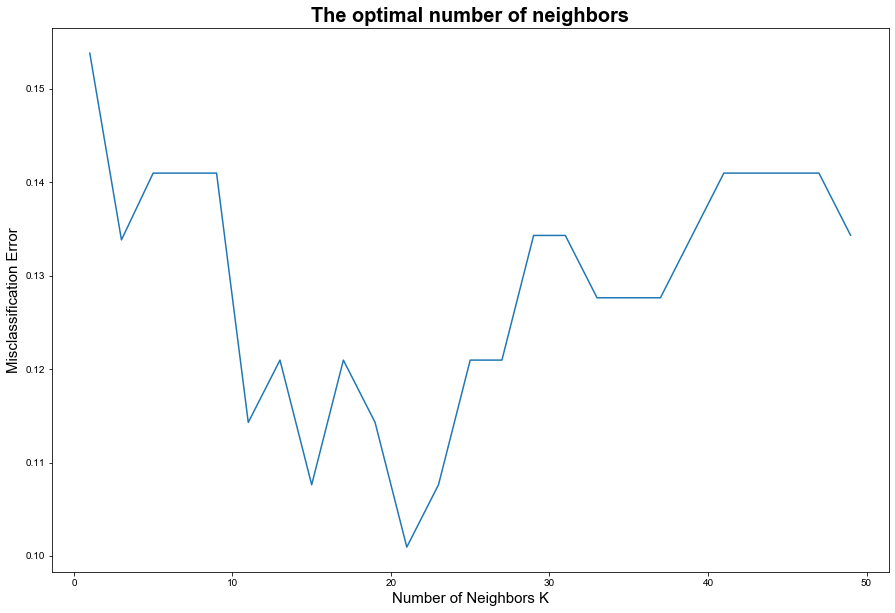

In [26]:
# showing the misclassification errors

MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

# Data Visualization

C:\Users\Wambui\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Wambui\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


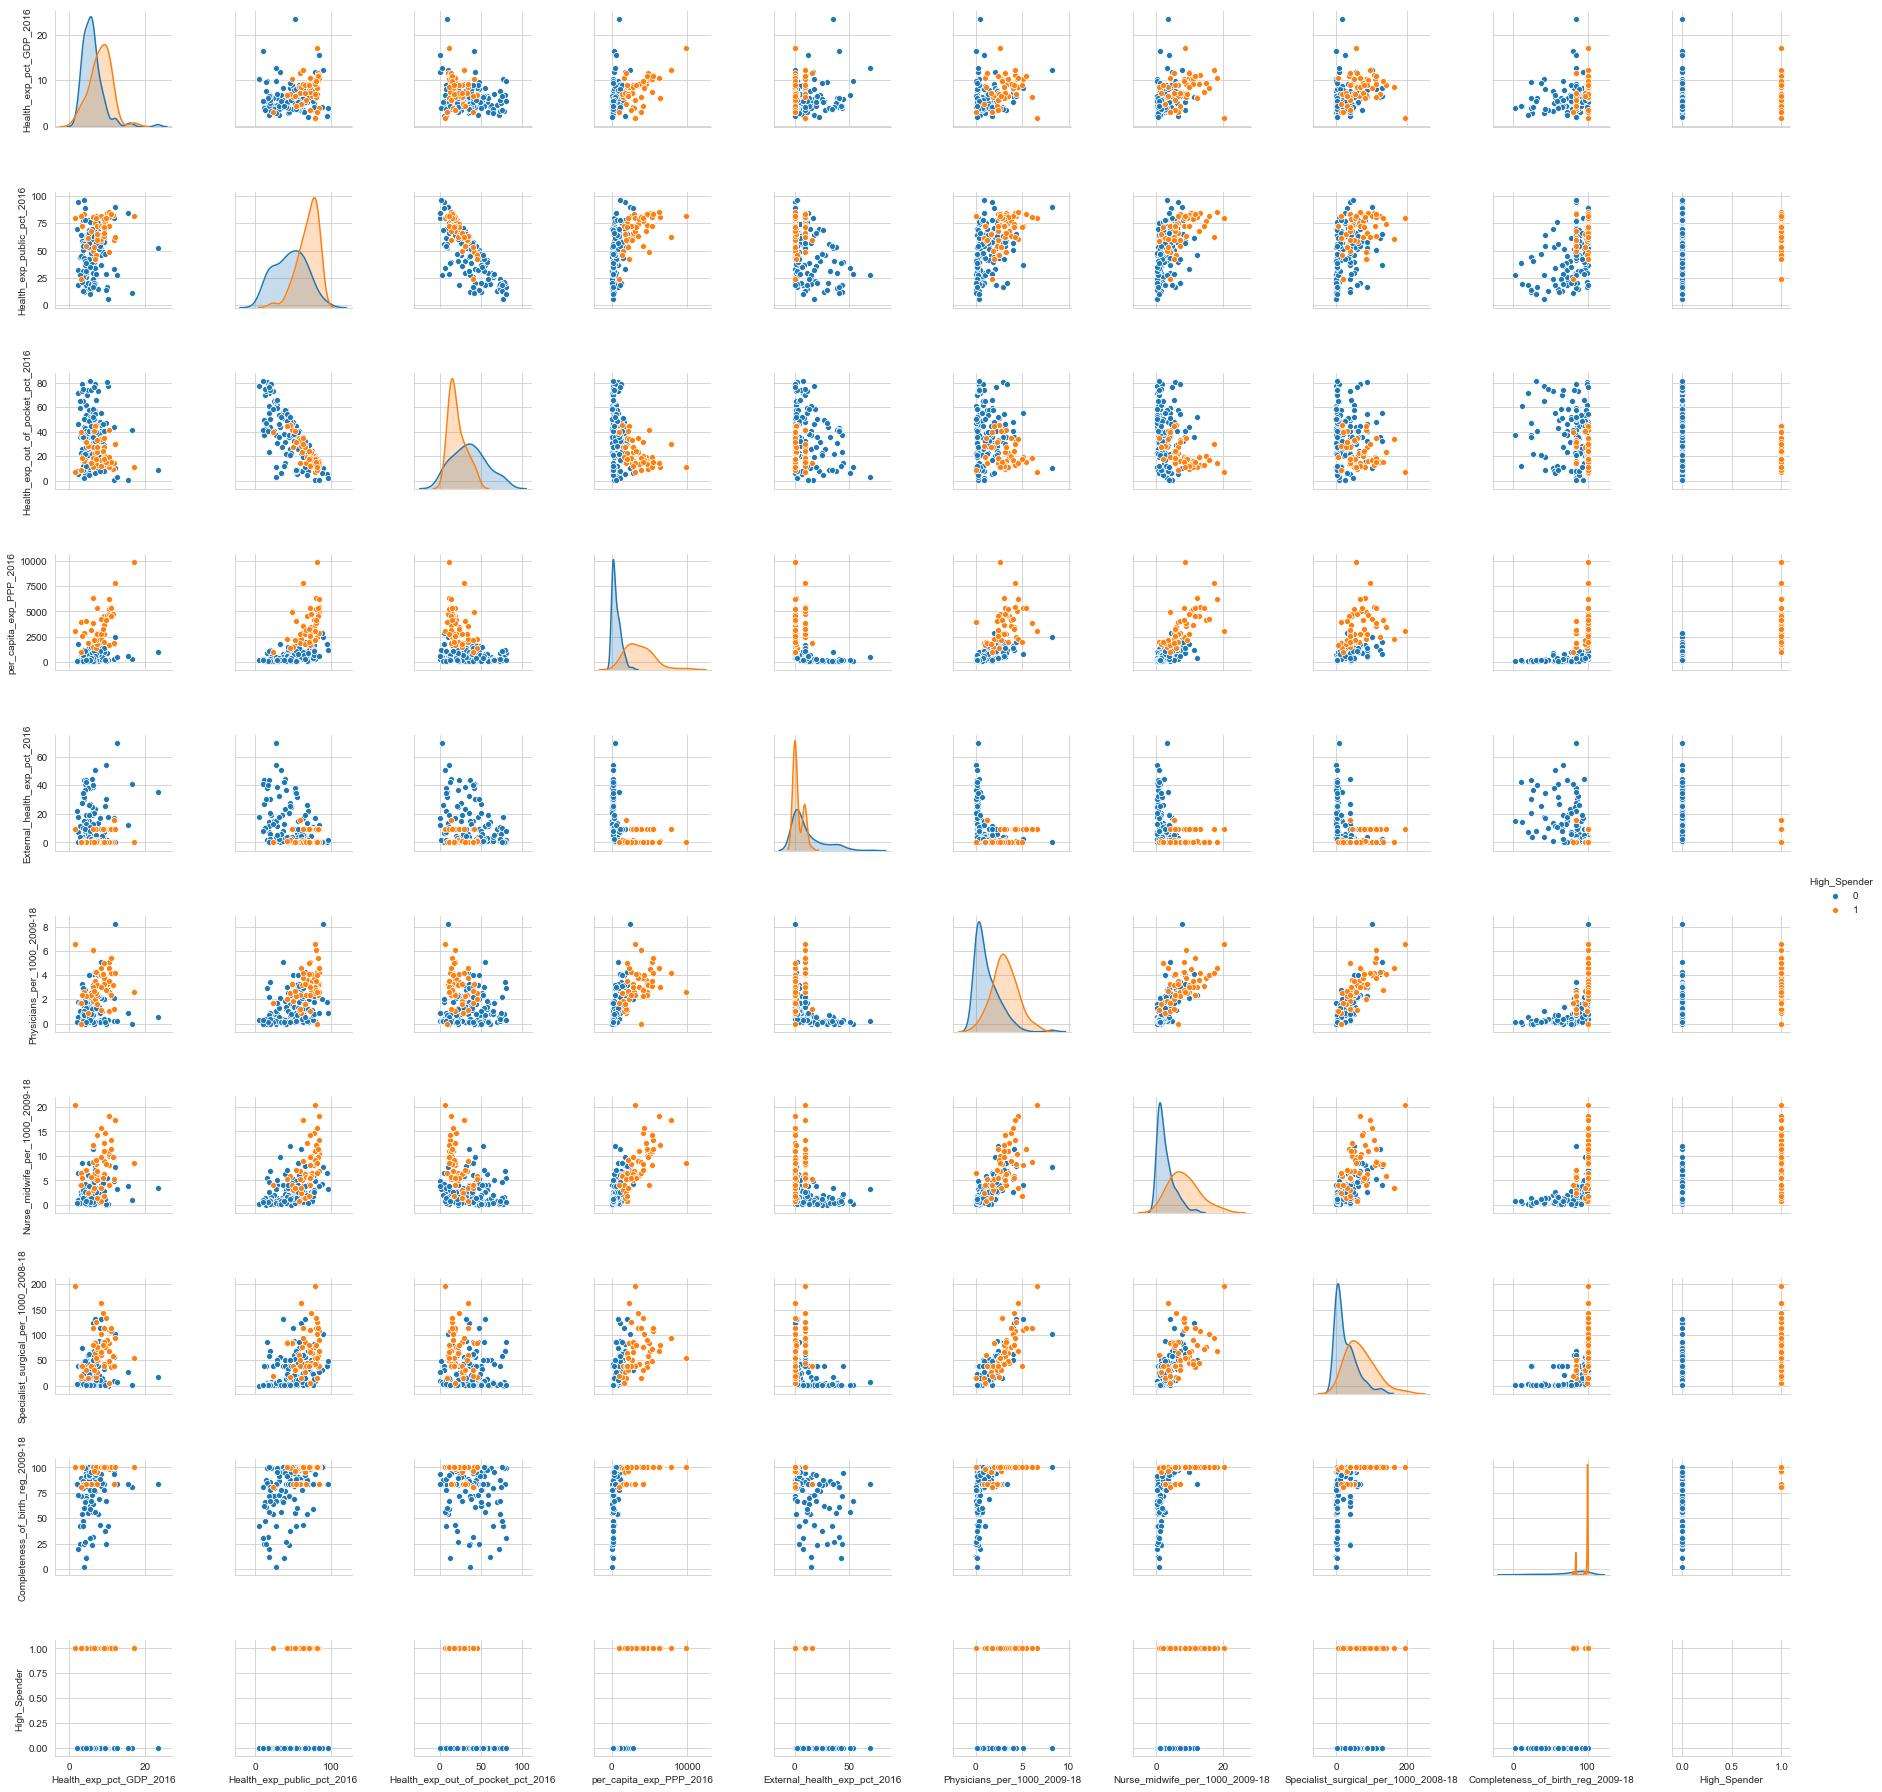

In [27]:
p=sns.pairplot(df, hue = 'High_Spender')

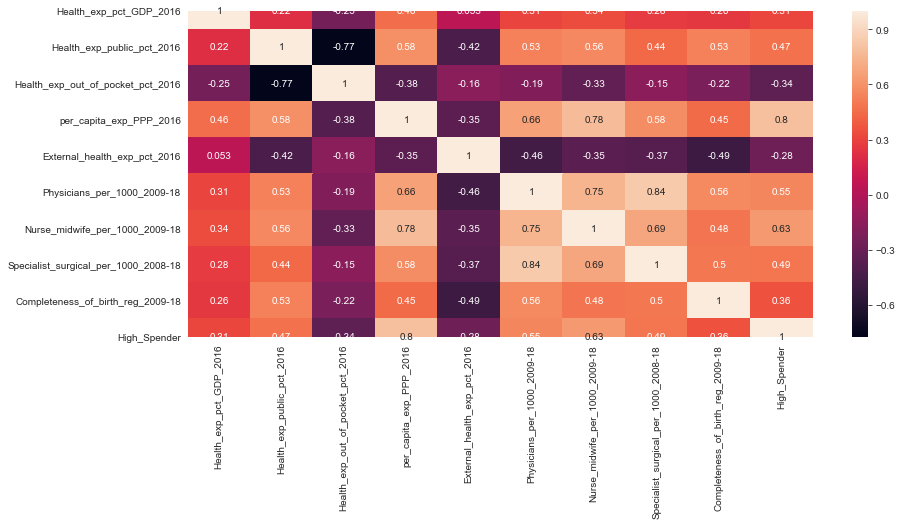

In [28]:
plt.figure(figsize=(14,6))

sns.heatmap(df.corr(), annot= True)